<a href="https://www.kaggle.com/code/sanmioduntan/online-learning-adaptivity-eda-ml?scriptVersionId=96920594" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv


Following the COVID-19 Pandemic in 2019 which resulted in lockdown of many countries in the world and consequent shut down of educational institutions,online education became a popular concept as it became the only adaptation available in place of traditional schooling. Set in Bangladesh, this dataset is important for analysis because as the world progresses to finding a new normal, it is important for policymakers and stakeholders to be equipped with the right information concerning online education as it affects not only students, but also working class who have had to learn new skills or consolidate old concepts via remote learning.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
project = pd.read_csv('/kaggle/input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv')

In [3]:
project.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
project.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [6]:
#Making name changes in the data 
project.rename(columns = {'Adaptivity Level':'Adaptivity'},inplace = True)
project.rename(columns = {'Age': 'Age Range'},inplace = True)

project.replace("Boy","Male",inplace=True)
project.replace("Girl","Female",inplace=True)
project.replace("Mid","Middle Class",inplace=True)
project.replace("Poor","Lower Class",inplace=True)
project.replace("Rich","Upper Class",inplace=True)

In [7]:
project

,Gender,Age Range,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,16-20,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low
1201,Female,16-20,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate
1202,Male,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Female,16-20,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low


In [8]:
#checking for null values 
project.isnull().sum()

Gender                 0
Age Range              0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity             0
dtype: int64

The dataset will be used to answer the following questions :
How are the students adapting to the online learning system?
What is the correlation between the independent variables measures and adaptivity?
What factors are most important in predicting the adaptivity levels of the students?

**To answer question 1; How are the students adapting to the online learning system**

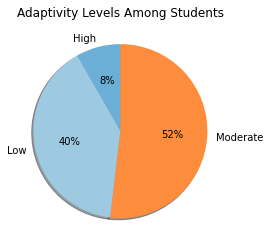

In [9]:
import numpy as np
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

Adapt= project.groupby([  
        'Adaptivity'])['Adaptivity'].count().to_frame()

plt.pie(Adapt.Adaptivity,colors= inner_colors,
        labels = Adapt.index,startangle = 90, autopct = "%1.0f%%", 
        explode = None, shadow = True)
plt.title("Adaptivity Levels Among Students")
plt.show()

The data shows that only 8% of students adapted highly to online education, over one half did moderately.

**Question 2 : What are the relationships between the independent variables measured and adaptivity?**

In [10]:
  #As id be grouping a lot of categories to test relationship
 #Afunction will be recreated for ease
  # the function returns each category grouped by tables

def create_groups(
    df: pd.DataFrame, var1: str, 
    var2: str)->pd.DataFrame:
    
    category = df.groupby([var1,var2])[var2].count().to_frame()
    
    print('Adaptivity' + ' by ' + var1)
    
    return category

In [11]:
#lets test the function with education level 

create_groups(project, 'Education Level', 'Adaptivity')

Adaptivity by Education Level


Adaptivity
Education Level Adaptivity            
College         High                 3
                Low                120
                Moderate            96
School          High                47
                Low                182
                Moderate           301
University      High                50
                Low                178
                Moderate           228

We can see that the highest frequency of high adaptivity is among the upper class and while the middle class has highest frequency of moderate level adaptivity.
As a function has been created to group each characteristic, Its easy represent each column in these tables using this function.To aid visualization I'd represent that data in a set of bar plots which can be viewed at a glance.

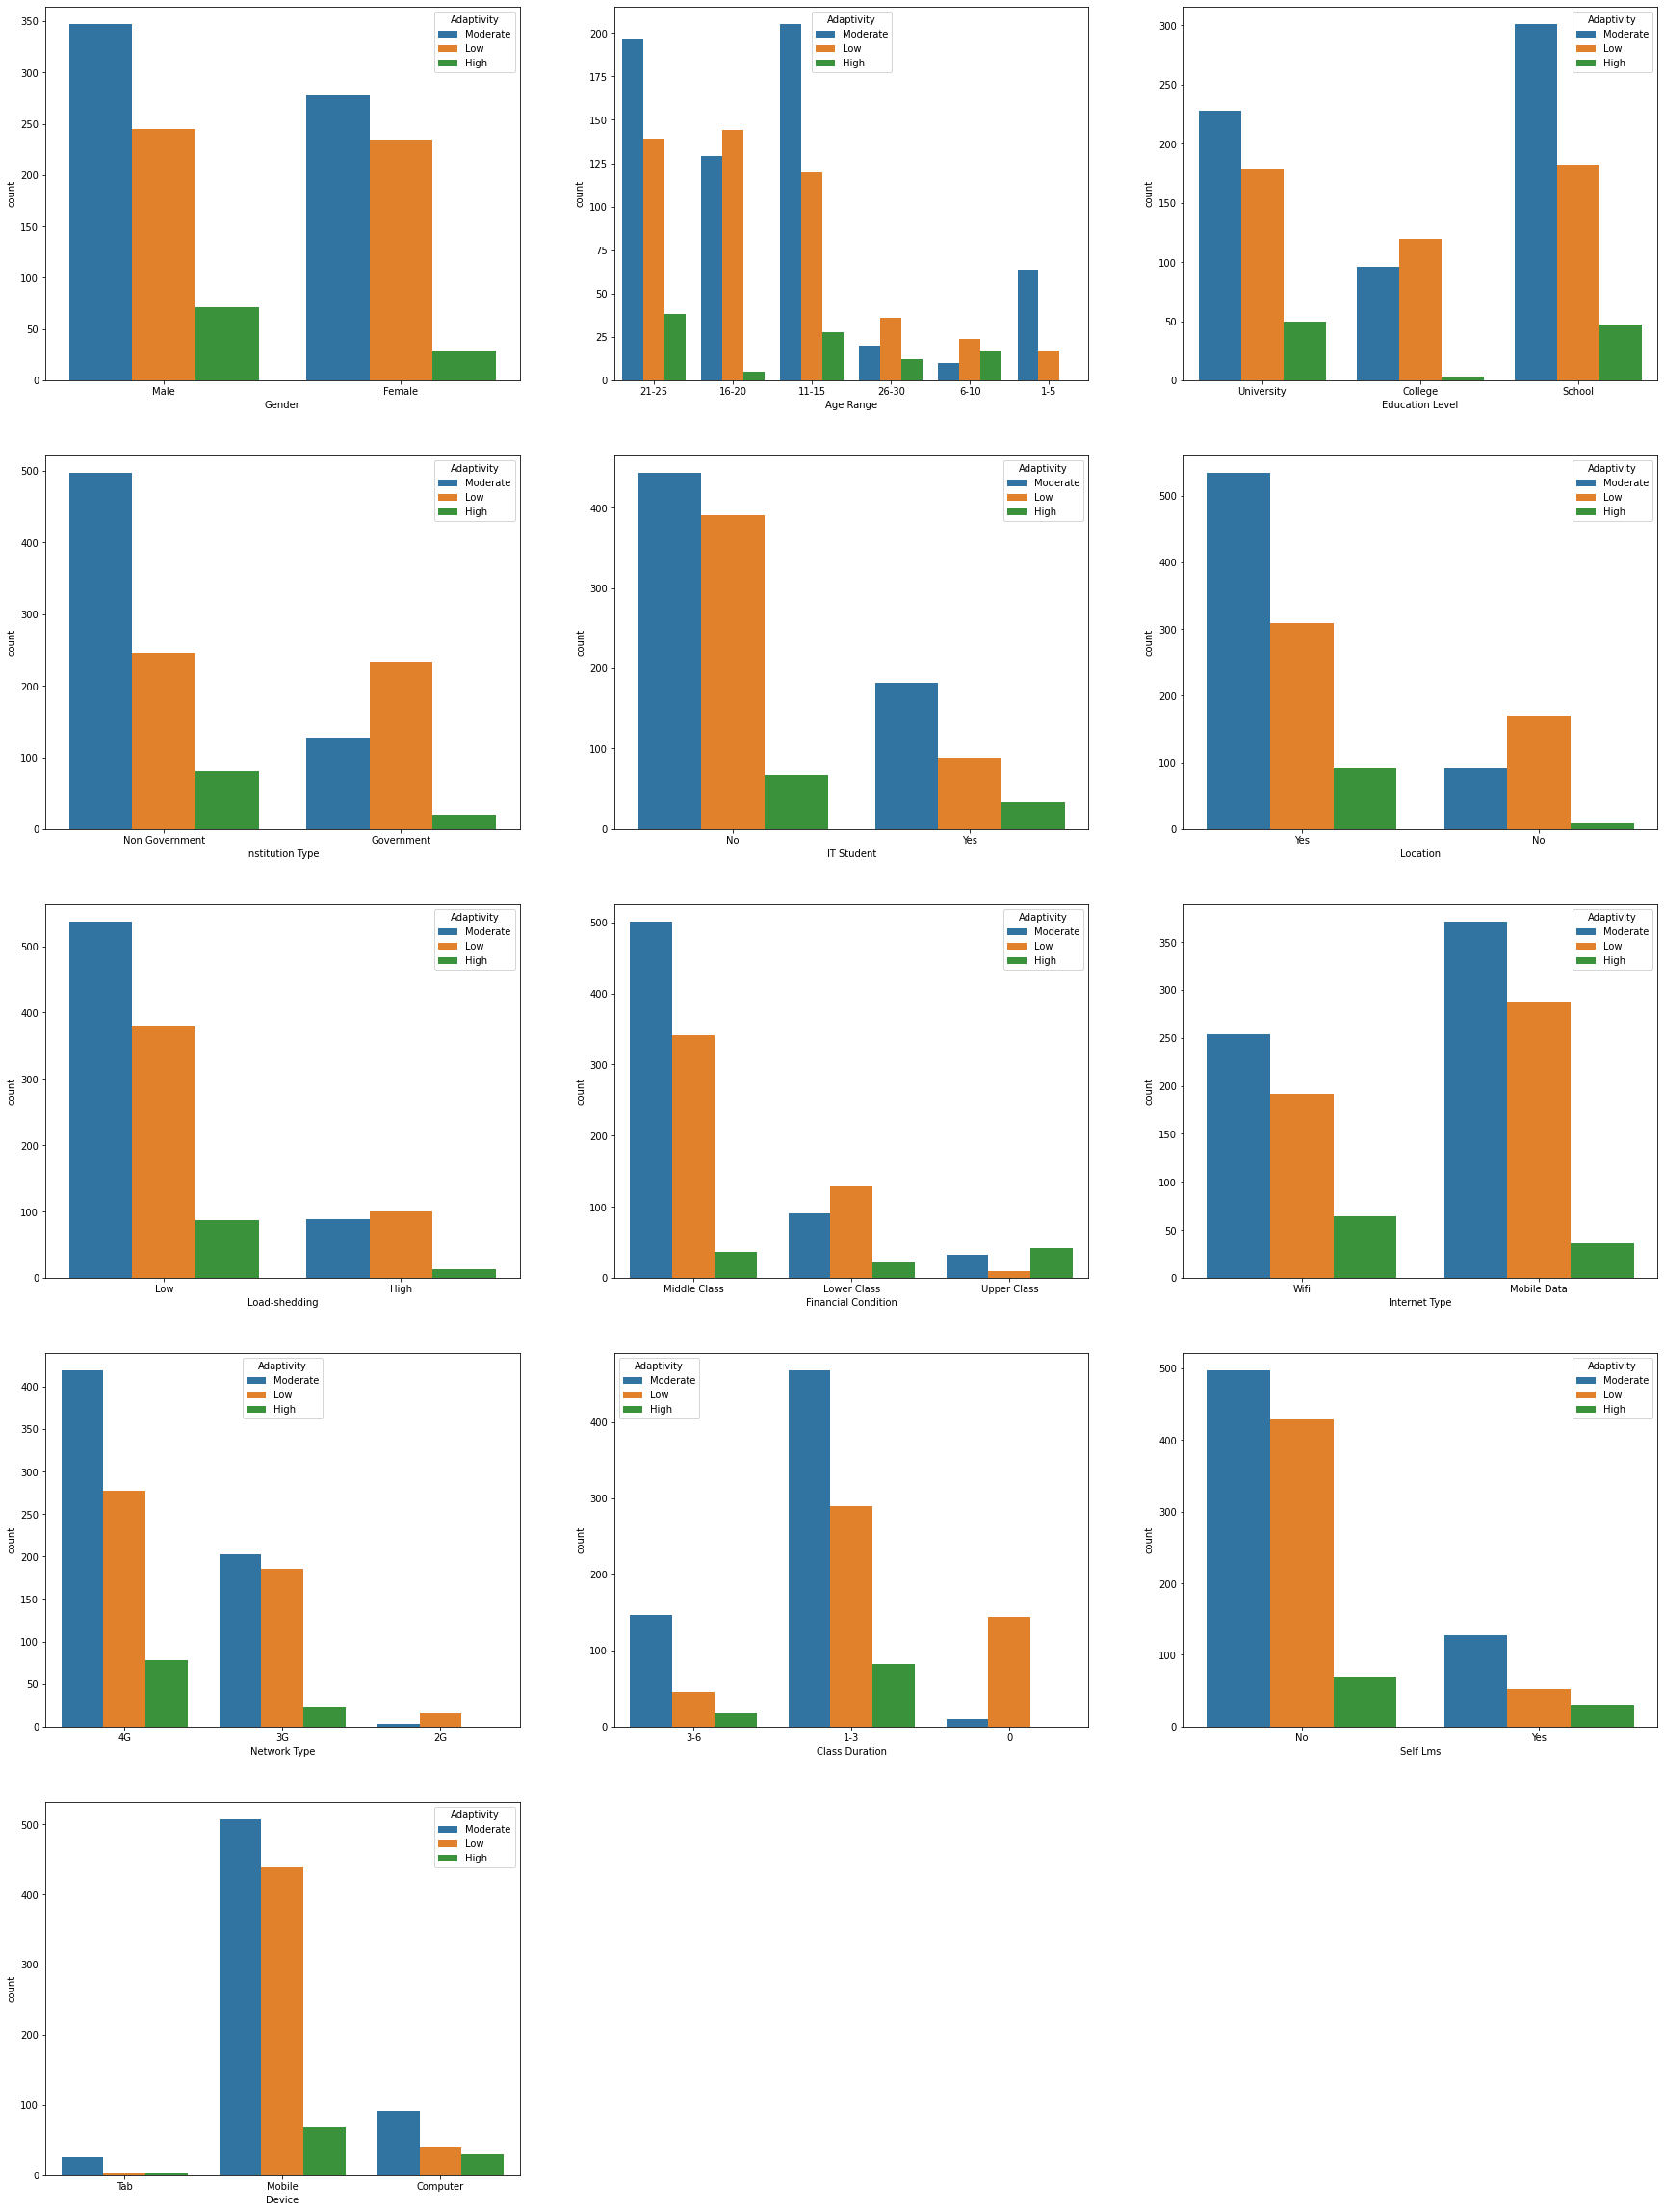

In [12]:
#to create barplot visualizations for the different categories 
i = 1
plt.figure(figsize = (30,50))
for feature in [col for col in project.columns if col!='Adaptivity' ]:
    plt.subplot(6,3,i),  
    sns.countplot(x = feature , hue='Adaptivity', data = project,)
 
    i +=1

The most important things to point out in this visulaizations:

Age Range- The stark differences in adaptivity by age range is very interesting. Respondents between Ages 1–5 did not achieve high adaptivity at all.High adaptivity is recorded mostly among 11–15 year olds and 21–25 olds typically in Junior High School and Tertiary Institutions 

Location- this variable tests whether students resided in the town or rural areas. The results showed that students in the urban area adapted better than those in rural areas. We can infer access to facilities, basic amenities,better internet connectiviy as reasons for this.

Load shedding- this tests the level of load shedding of electricity which in this case is inversely proportional to availabilty of power supply.Students with poor supply tended to adapt at less levels than their counterparts with low shedding and consequently better electricity power supply.

 Internet Type - Students who used WiFi had higher frequencies of high level adaptivity than those who used mobile networks, as most WIFi networks make use of high speed internet connectivity,we can infer that the better internet connectivity led to better ability to concentrate during classes.
 
Self LMS- this variable refers to availability of the educational institutions Learning Management System (LMS). Although a smaller portion of the sample size were exposed to LMS, they had higher rates of high adaptivity to online education.Interestingly, the level of Low adaptivity is also relatively minute compared to those who werent using the LMS.

**What factors are most important in predicting the adaptivity levels of the students?**

Using machine learning methods,we'd predict what features are most important in forecasting adaptivity level among the students.First wed transform the data into numeric variables so that our model can understand it easily 

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
#since the age comes as a range and is a string, python will automatically sort by alphabetical order
#to be able to sort numerically,id split the range and use the lower limit instead 
col1 = project["Age Range"].apply(lambda x: x.split("-")[0])
project1 = project.join(col1.to_frame(name="Lower limit Age"))
project1.drop(['Age Range'], axis = 1, inplace = True)
project1

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity,Lower limit Age
0,Male,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate,21
1,Female,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate,21
2,Female,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate,16
3,Female,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate,11
4,Female,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,College,Non Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16
1201,Female,College,Non Government,No,No,High,Middle Class,Wifi,4G,3-6,No,Mobile,Moderate,16
1202,Male,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,3G,1-3,No,Mobile,Moderate,11
1203,Female,College,Non Government,No,No,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Low,16


In [15]:
#will change to integer too 
project1['Lower limit Age'] = project1['Lower limit Age'].astype(int)

In [16]:
scaler = OrdinalEncoder()
names = project1.columns
d = scaler.fit_transform(project1)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(10)

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity,Lower limit Age
0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,4.0
1,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,4.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,3.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0
5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0
8,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
train = scaled_df.drop(['Adaptivity','Gender',],axis = 1)
test = scaled_df['Adaptivity']

In [19]:
X_train, X_test, y_train, y_test=train_test_split(train,test ,test_size=0.33,random_state=42)

In [20]:
#testing 4 models to find the best one 
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]


for a in models:
    a.fit(X_train, y_train)
    y_pred = a.predict(X_test)

    print(f'model: {str(a)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69        40
         1.0       0.87      0.82      0.84       166
         2.0       0.81      0.89      0.85       192

    accuracy                           0.83       398
   macro avg       0.82      0.78      0.79       398
weighted avg       0.83      0.83      0.83       398

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.62      0.45      0.52        40
         1.0       0.73      0.73      0.73       166
         2.0       0.73      0.78      0.75       192

    accuracy                           0.73       398
   macro avg       0.70      0.65      0.67       398
weighted avg       0.72      0.73      0.72       398

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       1.00      0.07      0.1

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
FinalM= RandomForestClassifier()
FinalM.fit(X_train, y_train)
y_pred = FinalM.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69        40
         1.0       0.86      0.82      0.84       166
         2.0       0.81      0.88      0.84       192

    accuracy                           0.83       398
   macro avg       0.82      0.77      0.79       398
weighted avg       0.83      0.83      0.83       398



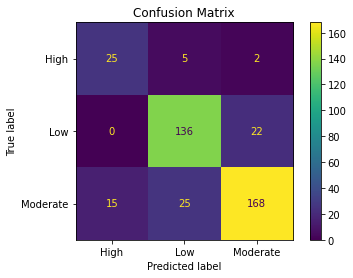

In [22]:
cm = confusion_matrix(FinalM.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Now to answer our question finally, having done all the confirmation we need that our model is good enough to predict the answer , lets ask the question

Text(0.5, 1.0, '5 most important features')

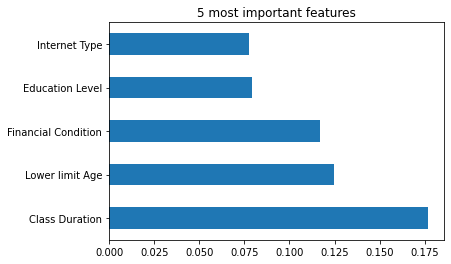

In [23]:
feature_importances=FinalM.feature_importances_
feature_importances_df=pd.DataFrame({'Variable':list(X_train), 'Variable importance':feature_importances})

feature_importances_df.sort_values('Variable importance',ascending=False)

feat_importances = pd.Series(FinalM.feature_importances_, index=train.columns)

feat_importances.nlargest(5).plot(kind='barh')
plt.title("5 most important features")

This analysis could be beneficial for the decision-makers of the education sector to get a proper idea about the current online education system and the level of adaptability of students 

With the information gleaned from this analysis,we can therefore make the following strategic recommendations:

Given the impact class duration has on adaptivity, Teaching staff should ensure that their classes fall between 1–3 hours. Hands on activities,short breaks and pop quizzes are also recommended especially one hour of didactic teaching to help sustain concentration and enhance adaptivity.

Age appropriate methods of teaching should still be employed even while teaching online.

Support can be given by the government institutions especially to students in government schools via provision of better internet connectivity options.

Parents are advised, within their financial means, to provide adequate support for their wards. This may be in form of household WiFi networks, supervised computer systems and moral support as their wards adapt to this new system of online learning.

Thank you for reading,please upvote if you enjoyed!